Initially I forked from this [kernel](https://www.kaggle.com/khursani8/fast-ai-starter-resnet34), changed architecture to ResNet 50, added augmentation and did some initial tuning of parameters like learning rate.

# Libraries import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/aptospreprocessed224x/train_images_processed_224x/train_images_processed_224x"))
package_path = '../input/'
os.sys.path.append(package_path) 
#print(os.listdir("../input/"))
#! pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ../input/nvidiaapex/repository/NVIDIA-apex-39e153a
# Any results you write to the current directory are saved as output.

In [2]:
#!pip install scikit-image --upgrade

In [3]:
## Testing update

import fastai
from fastai.vision import *
import cv2
fastai.__version__
#from skimage.data import imread
from skimage import restoration,exposure
import matplotlib.pyplot as plt
from skimage.filters import gaussian,laplace,median
import random
import warnings
warnings.filterwarnings("ignore")
from skimage.color import rgb2gray
from efficientnet_pytorch import EfficientNet

# Data

In [4]:
#x = torch.randn((64,1024))
#y = (x-x.data.mean())/(x.data.std()+1e-5)

#F.normalize(x, dim=0, p=2)
#y.mean(),y.std()
!pip install efficientnet-pytorch

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
#y.std()
'''
file_total=os.listdir('../input/deepfake-detection-challenge/deepfake_total/')
json_files=os.listdir('../input/deepfake/')
from pandas import DataFrame, read_json
train_df = DataFrame({'id':[],'label':[],'original':[],'split':[]})
for filename in json_files:
    #print(filename)
    if filename.find('meta')==0:
         
        #print('x')
        train_df=train_df.append(read_json('../input/deepfake/'+filename).T.reset_index().rename(columns={'index':'id'} ),ignore_index=True)
        #print(train_df.index.size)
#df =  DataFrame(data)
train_df.loc[:,'id']=train_df.id.apply(lambda x : x.split('.')[0]+'.jpg')
train_df=train_df[train_df.id.isin(file_total)]
train_df.loc[:,'label']=train_df.label.apply(lambda x : 1 if x=='FAKE' else 0)

train_df.to_csv('train_df.csv',index=False)
'''

"\nfile_total=os.listdir('../input/deepfake-detection-challenge/deepfake_total/')\njson_files=os.listdir('../input/deepfake/')\nfrom pandas import DataFrame, read_json\ntrain_df = DataFrame({'id':[],'label':[],'original':[],'split':[]})\nfor filename in json_files:\n    #print(filename)\n    if filename.find('meta')==0:\n         \n        #print('x')\n        train_df=train_df.append(read_json('../input/deepfake/'+filename).T.reset_index().rename(columns={'index':'id'} ),ignore_index=True)\n        #print(train_df.index.size)\n#df =  DataFrame(data)\ntrain_df.loc[:,'id']=train_df.id.apply(lambda x : x.split('.')[0]+'.jpg')\ntrain_df=train_df[train_df.id.isin(file_total)]\ntrain_df.loc[:,'label']=train_df.label.apply(lambda x : 1 if x=='FAKE' else 0)\n\ntrain_df.to_csv('train_df.csv',index=False)\n"

In [26]:
#PATH='../input/deepfake-detection-challenge/deepfake_total/'
PATH = Path('../input/deepfake-detection-challenge/deepfake_total_150/')
#PATH1=Path('../input/aptospreprocessed224x/train_images_processed_224x/')
PATH2 = Path('../input/')
#PATH1=Path('../input/train-cc-299/train_cc/train_cc/')

In [7]:
#len(file_names_f)

NameError: name 'file_names_f' is not defined

In [61]:
file_names_r=os.listdir('../input/deepFake_detection_challenge/real/')
file_names_f=os.listdir('../input/deepFake_detection_challenge/fake/')
train_df_f=pd.DataFrame({'id':file_names_f,'label':1}).sample(frac=0.3,random_state=14)
train_df_r=pd.DataFrame({'id':file_names_r,'label':0})

train_df_f.index.size,train_df_r.index.size

(23383, 16203)

In [62]:
train_df=train_df_r.append(train_df_f,ignore_index=False )
train_df.index.size

39586

In [63]:
#df_train = pd.read_csv('train_df.csv')
#dup_df=pd.read_csv(PATH2/'duplicate'/'strMd5.csv')
#over_dict={'0':1,'1':2,'2':1,'3':2,'4':3}
#df.head()
#over_dict['2']
sub='Y'
init='Y'

df_train =train_df.sample(frac=1,random_state=14)

In [64]:
#df_train=df.append(df_old_unique.loc[df_old_unique.id_code.isin(l_1 +l_2 +l_3+l_4)],ignore_index=True)
#df_train.diagnosis.value_counts()
#df_train.split.value_counts()
df_train=df_train.reset_index(drop=True)
df_train.head()

,id,label
0,sxuuldvhix_150.jpg,0
1,dattpmhfah_150.jpg,1
2,dewntsgucs_150.jpg,0
3,brfjxrbezo_150.jpg,0
4,bryusijbzk_150.jpg,1


In [65]:
#import random
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import train_test_split
x=df_train['id']
y=df_train['label']
#x, y = shuffle(x, y, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.10,
                                                      stratify=y, random_state=42)

In [ ]:
#df[df.id_code.isin(train_x)].diagnosis.value_counts()
len(train_x)

In [ ]:
'''
class Oversample():
    def __init__(self,df):
        self.df=df.copy()
        over_dict={'0':1,'1':2,'2':1,'3':3,'4':3}
        self.df['over_sample_list']=self.df['id_code'].apply(lambda x :[x]*over_dict[str(self.df[self.df.id_code==x]['diagnosis'].values[0]) ])
        
    def get_overample_name(self):
        return np.hstack(self.df['over_sample_list']).tolist()
train_df=df_train[df_train.id_code.isin(train_x)]
valid_df=df_train[df_train.id_code.isin(valid_x)]
df_i=train_df.copy()
#sample=  Oversample(train_df)  
#oversample_list=sample.get_overample_name()
#print(df.index.size )
#print(len(oversample_list))
#oversample   
oversample='N'
if oversample=='Y':

    image_boost_df=pd.DataFrame({'id_code':[],'diagnosis':[]})
    #a=lambda x : train_df.loc[train_df.id_code==x]
    for x in oversample_list:

        image_boost_df=image_boost_df.append( train_df.loc[train_df.id_code==x])   
if oversample=='Y':
    
    #train_df=train_df[train_df.id_code.isin(oversample_list)]
    print(train_df.index.size)
    image_boost_df=image_boost_df.sample(frac=1).reset_index(drop=True)
    print(image_boost_df.index.size)
    df_i=image_boost_df.copy()
    image_boost_df=image_boost_df.append(valid_df,ignore_index=True)
    val_idx=list(image_boost_df.loc[image_boost_df.id_code.isin(valid_x)].index.values)
    print(image_boost_df.index.size)
'''

In [ ]:
sz=256
bs=54
# get val idx by appending valid df


In [ ]:
#!ls ../input/resnet50/
#a=[1]*3
#df=pd.DataFrame({'name':[a,a]})
#list(o_sample.values)
#df.name
#np.hstack(df.name).tolist()
#b=np.merge(o_sample.values,0) 
#im=cv2.imread('../input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped/10003_left.jpeg')
#im.shape

In [ ]:
# copy pretrained weights for resnet50 to the folder fastai will search by default
#Path('/tmp/.cache/torch/checkpoints/').mkdir(exist_ok=True, parents=True)
#!cp '../input/resnet50/resnet50.pth' '/tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth'

In [ ]:
#df.diagnosis.value_counts()
#image_boost_df.diagnosis.value_counts()
#over_dict

So our train set is definitely imbalanced, majority of images are normal (without illness).

In [66]:
#oversampling logic
#train_df.diagnosis.unique()
#val_idx
df_train=df_train.reset_index(drop=True)
val_idx=df_train[df_train.id.isin(valid_x)].index.values.tolist()

# Model

In [46]:
from skimage.filters import gaussian
def crop_image_from_gray(img,tol=9):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img
def open_im(fn): #a function that reads RGBY image
    #print(fn)
    s=fn
    #print(fn)
    try:
        #ext='../input/retinopathy-train-2015/rescaled_train_896/rescaled_train_896/'
        #ext='../input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped/'
        ext='../input/train-cc-old/train_cc_old/train_cc_old/'
        if os.path.isfile(ext+s[s.rfind('/')+1:].split('.')[0]+'.png'):
            #fn='../input/diabetic-retinopathy-resized/resized_train/resized_train/'+s[s.rfind('/')+1:].split('.')[0]+'.jpeg'
            fn=ext+s[s.rfind('/')+1:].split('.')[0]+'.png'
            #print(fn)
    except:
        pass
    im = cv2.imread(fn)
    #b=time.time()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    
    #image = crop_image_from_gray(im)
    
     
    #image = cv2.resize(image, (512, 512))
    #k = np.max(im.shape)//20*2+1
    #bg = cv2.GaussianBlur( image , (0,0) , 30)
    #image=cv2.addWeighted ( image,4,bg  ,-4 ,128)
    #a=time.time()
    #print('ben',a-b)
   
    #p2, p98 = np.percentile(image, (2, 98))
    #im=exposure.rescale_intensity(image,(p2,p98))
    #im=gaussian(im,1)
    #b=time.time()
    #print(b-a)
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
    #colors = ['red','green','blue','yellow']
    #colors = ['blue','red','green','yellow']
    #colors = ['green','red','blue','yellow']
    #print(os.path.join(path, +'_'+'red'+'.png'))
    #flags = cv2.IMREAD_GRAYSCALE
    return Image(pil2tensor(im, np.float32).div_(255))

In [43]:
class CustomImageList(ImageList):
    def open(self,fn):
        return open_im(fn)
        

In [ ]:
!ls -l ../input/deepfake-detection-challenge/deepfake_total_150/real

In [ ]:
#train_df.head(2)
#image_boost_df.head(4)
#image_boost_df['diagnosis']=image_boost_df.diagnosis.apply(lambda x : int(x))
#!nvidia-smi
#!cp  ../input/deepfake-detection-challenge/deepfake_total_150/fake/*.*  ../input/deepfake-detection-challenge/deepfake_total_150 

In [ ]:
#!find ../input/deepfake-detection-challenge/deepfake_total_150/real -name '*.*' -exec mv --target-directory=../input/deepfake-detection-challenge/deepfake_total_150 '{}' +

In [ ]:
#df_train.head()

In [67]:

src = (
     ImageList.from_df(df_train,PATH,cols='id',suffix='')
        .split_by_idx(val_idx)
        .label_from_df(cols=1)#,label_cls=FloatList
    )
#src PATH1z folder='train_images_processed_224x'

In [ ]:
#set(src.train.x.items)
print(src.c)
#labels = image_boost_df.iloc[:,df_names_to_idx(1, image_boost_df)]
#labels , max_rotate=5., max_zoom=1.2, max_lighting=0.2,max_warp=0. #,
#df_train.iloc[3668]
#src.train.y.items[3668]

In [81]:
tfms = get_transforms(do_flip=True, flip_vert=False,max_zoom=1.3,max_rotate=20,max_warp=0.
                     #,xtra_tfms=[(symmetric_warp(magnitude=(-0.3,0.3) ))]
                     )

In [ ]:
tfms

In [82]:
sz=256
bs=48
data = (
    src.transform(tfms,size=128,resize_method =ResizeMethod.SQUISH )
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)


In [ ]:
data.c

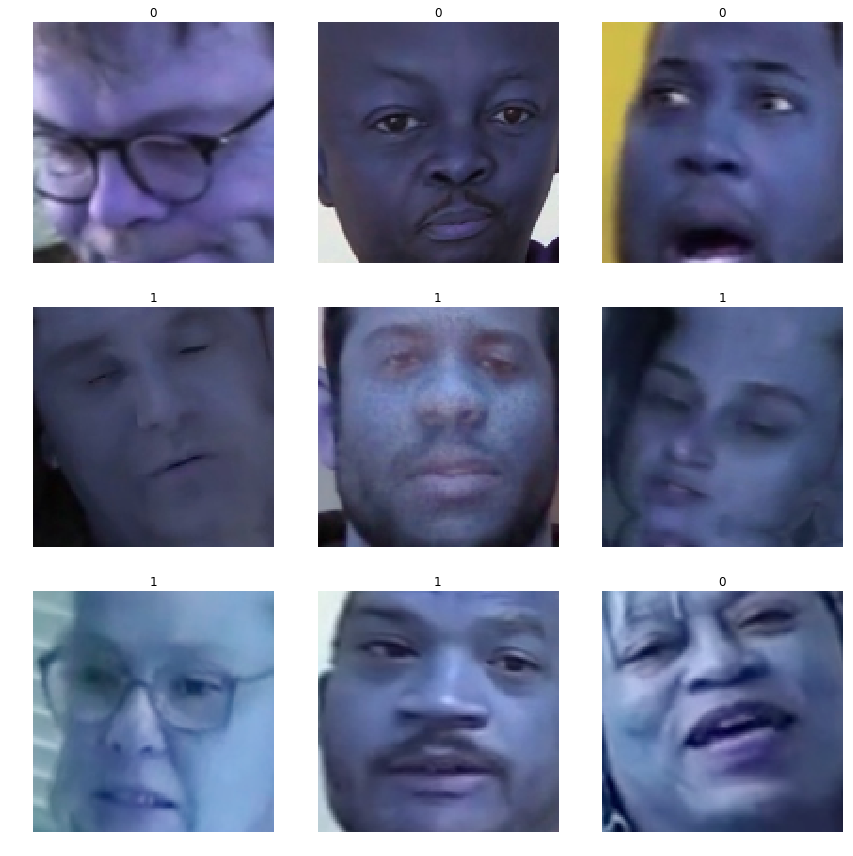

In [71]:
#data.train_ds.x.items[0]
#train_df[train_df.id_code=='bcb0498ed2c1']
#data.show_batch(3)
data.show_batch(3)

In [ ]:
#data.show_batch(3)##
#body = create_body(m.densenet201, False, -1)
#body

In [57]:
class ArcMarginProduct(nn.Module):
    r"""Implement of large margin arc distance: :
        Args:
            in_features: size of each input sample
            out_features: size of each output sample
            s: norm of input feature
            m: margin
            cos(theta + m)
        """
    def __init__(self, in_features, out_features=2):
        
      
        super(ArcMarginProduct, self).__init__()
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.reset_parameters()
        #nn.init.kaiming_uniform_(self.weight)

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1)) # eq to input . This is more or less like Kaiming normal .
        #we use this to ensure values remain between 0 and 1 . Since std deviation reduces to almost half every layer
        # we can try some trick  multiplying it by 2 
        self.weight.data.uniform_(-stdv, stdv)
    
    def forward(self, features):
        #x=self.head(features)
        #print(self.weight.shape)
        #self.fc1.weight=nn.Parameter(F.normalize(self.fc1.weight)).cuda()
        #cosine = F.linear(F.normalize(features), F.normalize(self.weight.cuda()))
        cosine = F.linear(features, self.weight.cuda())
        #cosine=(cosine-cosine.data.mean())/(cosine.data.std()+1e-5)
        cosine = cosine.clamp(-1, 1)
        #self.fc1(F.normalize(x))
        #F.linear(F.normalize(x), F.normalize(self.weight.cuda()))
        return cosine

class CustomheadDense(nn.Module):
    
    r"""Implement of large margin arc distance: :
        Args:
            in_features: size of each input sample
            out_features: size of each output sample
            s: norm of input feature
            m: margin
            cos(theta + m)
        """
    def __init__(self, in_features, out_features=1):
        super(CustomheadDense, self).__init__()
        #self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        #self.register_parameter('normweights',self.weight)
        # nn.init.xavier_uniform_(self.weight)
        #body = create_body(m.densenet201, False, -1)
        #body = create_body(m.resnet50, True, -2)
#body = create_head(ArcMarginProduct, pretrained, 0)
        #nf = num_features_model(nn.Sequential(*body.children())) * 2
        #head = 
        self.head=create_head(1920*2, out_features,[1920],  ps=0.5, bn_final=False) # 1024 no of classes
        self.arc_margin=ArcMarginProduct(int(in_features/2),out_features)
        #self.mse=nn.Linear(out_features,1,bias=False)
        #self.fc1=nn.Linear(1024,5004,bias=False)
        #self.custom=nn.Sequential(self.head,self.fc1)
        #self.reset_parameters()

   # def reset_parameters(self):
        #stdv = 1. / math.sqrt(self.weight.size(1))
        #self.weight.data.uniform_(-stdv, stdv)
    def forward(self, features):
        x=self.head(features)
        #w=self.fc1.weight
        #self.fc1.weight=nn.Parameter(F.normalize(self.fc1.weight)).cuda()
        #cosine = self.arc_margin(x)
        #F.linear(F.normalize(x), F.normalize(w))
        #self.arc_margin(x)
        #F.linear(F.normalize(x), F.normalize(self.weight.cuda()))
        #cosine = cosine.clamp(-1, 1) 
        #mse=self.mse(cosine)
        #self.fc1(F.normalize(x))
        #F.linear(F.normalize(x), F.normalize(self.weight.cuda()))
        return x  
class Customheadseres(nn.Module):
    r"""Implement of large margin arc distance: :
        Args:
            in_features: size of each input sample
            out_features: size of each output sample
            s: norm of input feature
            m: margin
            cos(theta + m)
        """
    def __init__(self, in_features, out_features=5004):
        super(Customheadseres, self).__init__()
        #self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        #self.register_parameter('normweights',self.weight)
        # nn.init.xavier_uniform_(self.weight)
        #body = create_body(se_resnet101, True, -2)
        #body = create_body(m.resnet50, True, -2)
#body = create_head(ArcMarginProduct, pretrained, 0)
        nf = in_features*2
        #num_features_model(nn.Sequential(*body.children())) * 2
        #head = 
        self.head=create_head(nf, in_features,  ps=0.5, bn_final=False) # 1024 no of classes
        self.arc_margin=ArcMarginProduct(in_features,512)
        self.mse=nn.Linear(512,1,bias=False)
        #self.fc1=nn.Linear(1024,5004,bias=False)
        #self.custom=nn.Sequential(self.head,self.fc1)
        #self.reset_parameters()

   # def reset_parameters(self):
        #stdv = 1. / math.sqrt(self.weight.size(1))
        #self.weight.data.uniform_(-stdv, stdv)
             

    def forward(self, features):
        x=self.head(features)
        #w=self.fc1.weight
        #self.fc1.weight=nn.Parameter(F.normalize(self.fc1.weight)).cuda()
        cosine = self.arc_margin(x)
        #F.linear(F.normalize(x), F.normalize(w))
        #self.arc_margin(x)
        #F.linear(F.normalize(x), F.normalize(self.weight.cuda()))
        #cosine = cosine.clamp(-1, 1)
        mse=self.mse(cosine)
        #self.fc1(F.normalize(x))
        #F.linear(F.normalize(x), F.normalize(self.weight.cuda()))
        return mse

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=2.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        targets=targets.view(-1).long()
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

    
def roc_score(inp, target):
    _, indices = inp.max(1)
    return torch.Tensor([roc_auc_score(target, indices)])[0]

In [ ]:
class ArcFaceLoss(nn.modules.Module):
    def __init__(self,s=35.0,m=0.5):
        super(ArcFaceLoss, self).__init__()
        self.regress_loss = nn.BCEWithLogitsLoss()
        self.s = s
        self.easy_margin = False
        self.cos_m = math.cos(m) 
        self.sin_m = math.sin(m) 
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, inputs, labels, epoch=0,reduction=None):
        cosine = inputs
        sine = torch.sqrt(1.0 - torch.pow(cosine, 2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)

        one_hot = torch.zeros(cosine.size(), device='cuda')
        one_hot.scatter_(1, labels.view(-1, 1).long(), 1)
        # -------------torch.where(out_i = {x_i if condition_i else y_i) -------------
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s
        loss1 = self.regress_loss(output, labels) # this is as per paper what is missing here is centralized features
        loss2 = self.regress_loss(cosine, labels)
        gamma=1
        loss=(loss1+gamma*loss2)/(1+gamma)
        return loss.mean()

In [38]:
from torch.utils import model_zoo
if sub=='N':
    
    md_ef = EfficientNet.from_pretrained('efficientnet-b5', num_classes=1000)
else :
    md_ef = EfficientNet.from_name('efficientnet-b5')

In [23]:
from torchvision import models as m
#!pip install pretrainedmodels
#import pretrainedmodels as pt
#from fastai.vision.models.cadene_models import *
def dense(pre):
    
    #model=nn.Sequential(body, head)
    model = m.densenet121(pretrained=pre)
  
    model.classifier = (nn.Linear(1024, 5))

   
    return model
def dense201(pre):
    
    #model=nn.Sequential(body, head)
    model = m.densenet201(pretrained=False)
  
    #model.classifier = (nn.Linear(1024, 5))

   
    return model
def _densenet_split(m): return (m[0][0][6],m[1])# (m.features[6],)   #

def seresnet101(pretrained=True):
    pretrained = 'imagenet' if pretrained else None
    model = se_resnet101(pretrained=True)
    return model

def xception_pt(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pt.xception(pretrained=pretrained)
    return model
def _xception_split(m): return   (m.block6, m.last_linear) 

def inresnetv2(pretrained=True):
    pretrained = 'imagenet' if pretrained else None
    model = pt.inceptionresnetv2(pretrained=pretrained)
    return model

In [ ]:
#se_resnet101()@2048
#dense(None)
#seresnet101()
#xception()
#nn.Sequential(*(xception_pt().children()))[0][11]
#xception_pt().last_linear
#body = create_body(xception_pt, False, None)
#body[0][11]
#m=dense201(True)''
#del m

In [24]:
from torch.utils.data.sampler import WeightedRandomSampler

class OverSamplingCallback1(LearnerCallback):
    def __init__(self,learn:Learner, weights:torch.Tensor=None):
        super().__init__(learn)
        labels = self.learn.data.train_dl.dataset.y.items.astype(int)
        _,counts = np.unique(labels, return_counts=True)
        counts = 1. / np.sqrt(counts)  # non-linear weights
        #print(labels)
        #print(counts,counts[labels])
        #self.weights = (weights if weights is not None else torch.DoubleTensor(counts[labels]))
        self.weights = (weights if weights is not None else torch.DoubleTensor(counts[labels]))

    def on_train_begin(self, **kwargs):
        self.learn.data.train_dl.dl.batch_sampler = BatchSampler(
            WeightedRandomSampler(self.weights, len(self.learn.data.train_dl.dataset)),
            self.learn.data.train_dl.batch_size, False)

In [ ]:
from torch.utils.data.sampler import WeightedRandomSampler
from torch.utils.data.sampler import BatchSampler, WeightedRandomSampler
from random import shuffle

class class_balancer(Sampler):
    def __init__(self, arr, bs ,ratio,bn):
        
        self.ratio=np.array(ratio)
        self.counts=[int(ratio[0]*(bs//self.ratio.sum())),int(ratio[1]*(bs//self.ratio.sum())),
                     int(ratio[2]*(bs//self.ratio.sum())),
               int(ratio[3]*(bs//self.ratio.sum())),int(ratio[4]*(bs//self.ratio.sum()))]
        
        #self.df=df.iloc[trn_idx]
        self.bs=bs
        self.arr=arr
        self.batch_num=bn
        #self.trn_idx=trn_idx
        
    def __iter__(self):
        #print('y1')
        flat_batch=[]
        #sample=[random.sample(self.df.loc[(self.df.diagnosis==i) & (self.df.index.isin(trn_idx))]
        #                      .index.tolist(),c) for i,c in enumerate(self.counts) ]
        #print(self.arr.shape[0])
        for i in range(self.batch_num):
            
            sample=[random.sample(np.where(self.arr==float(i))[0].tolist(),c) for i,c in enumerate(self.counts)]
           
            sample=np.hstack(sample).tolist()
            if len(sample)<self.bs:
                
                sample=sample+random.sample(sample,self.bs-len(sample))
            random.shuffle(sample)
            flat_batch.append(sample )
        #sample=np.hstack(sample).tolist()
        flat_batch=np.hstack(flat_batch).tolist()
        
        #np.array(flat_batch).flatten().tolist()
        flat_batch=flat_batch[0:self.arr.shape[0]]
        print('unique',np.unique(self.arr[flat_batch],return_counts=True))
        #print(type(flat_batch),len(flat_batch))
        return iter(flat_batch)

    def __len__(self):
        #print('len',len(self.arr.tolist()))
        return len(self.arr.tolist())

class OverSamplingCallback1(LearnerCallback):
    def __init__(self,learn:Learner,weights=None,bn=None):
        super().__init__(learn)
        labels = self.learn.data.train_dl.dataset.y.items
        self.labels_array=np.array(list(labels))
        _,self.counts = np.unique(labels, return_counts=True)
        self.bn=bn
       
        #counts = 1. / np.sqrt(counts)  # non-linear weights
       
        #self.train_idx=np.setdiff1d(arange_of(df), val_id)
        self.ratio=weights
        self.bs=self.learn.data.train_dl.batch_size
        self.learn=learn
        #self.weights = (weights if weights is not None else torch.DoubleTensor(counts[labels]))
       
    def on_epoch_begin(self,**kwargs):
        print('e')
        self.sample= class_balancer(arr=self.labels_array,bs=self.bs,ratio=self.ratio,bn=self.bn)
        self.learn.data.train_dl.dl.batch_sampler = BatchSampler(self.sample,self.learn.data.train_dl.batch_size, False)

    '''    
    def on_batch_begin(self, **kwargs):
        print('b')
        #self.sample= class_balancer(df=self.df,bs=self.bs,trn_idx=self.train_idx,ratio=self.ratio)
        
        #self.learn.data.train_dl.dl.batch_sampler = BatchSampler(self.sample,self.learn.data.train_dl.batch_size, False)

          #WeightedRandomSampler(self.weights, len(self.learn.data.train_dl.dataset))
        self.learn.data.train_dl.dl.batch_sampler = BatchSampler(self.sample,self.learn.data.train_dl.batch_size, False)
    '''

In [ ]:
from fastai.torch_core import *
from fastai.callbacks import *
from fastai.basic_train import *
from torch.autograd import Variable

class GradAccumulation(LearnerCallback):
    def __init__(self,learn:Learner,num):
        super().__init__(learn)
        self.total_batch_num=num
        print('total_batch_num',num)
    def on_epoch_begin(self, **kwargs):
        #super().__init__(learn)
        self.n=0
        self.total_loss=0
        #self.loss=0
        self.last_n=0
        self.steps=3
    def on_backward_begin(self,last_loss,**kwargs):
        print(self.n)
        if (self.n+1)%self.steps==0 :
            #print('n',self.n)
            print('batch',self.n)
            self.total_loss+=last_loss
            self.total_loss=self.total_loss/2
            skip=False
        else :
            
            self.total_loss+=last_loss
            if ( self.n==self.total_batch_num):
                print('last batch')
                skip=False
            else :
                
                skip=True
        
       
        self.last_n=self.n    
        self.n+=1
        #self.total_loss=last_loss/2
        #skip=True
        return {'last_loss':self.total_loss,'skip_bwd':skip}
    def on_backward_end(self,**kwargs):
        if (self.last_n+1)%self.steps==0:
            self.total_loss=0
            
            skip=False
        else:
            
            if ( self.last_n==self.total_batch_num):
                print('last batch')
                skip=False
            else :
                
                
                skip=True
            
        return {'skip_bwd':skip}
    
    def on_step_end(self,**kwargs):
        if (self.last_n+1)%self.steps==0:
            
            #self.total_loss=0
            skip=False
        else:
            
            
            if ( self.last_n==self.total_batch_num):
                print('last batch')
                skip=False
            else:
                
                
                skip=True
        return {'skip_bwd':skip}

In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
def qk(y_pred, y):
    return torch.tensor(cohen_kappa_score(torch.round(y_pred), y, weights='quadratic'), device='cuda:0')

In [38]:
from fastai.torch_core import *
from fastai.callbacks import *
from fastai.basic_train import *
from fastai.metrics import *
from torch.autograd import Variable
kappa = KappaScore()
precision=Precision()
recall=Recall()
kappa.weights = "quadratic"
loss_func = MSELossFlat()
'''
#ar=ArcFaceLoss().cuda()
#custom_head=CustomheadDense(1920,480)
#custom_head=Customheadseres(2048,data.c)
#FocalLoss(gamma=2.)
 
learn = create_cnn(data, 
                    base_arch=m.densenet201
                   #dense
                    ,cut=-1
                   ,lin_ftrs=[960]
                   ,split_on=_densenet_split
                   #lambda m: (m[0][3],     m[1])
                    #,split_on=_densenet_split
                    
                    ,metrics=[qk,exp_rmspe,r2_score],loss_func=loss_func
                    
                    ,pretrained=True,path='.')
learn.callback_fns.append(partial(SaveModelCallback,monitor='valid_loss',mode='min'))
learn.callback_fns.append(partial(ReduceLROnPlateauCallback, min_delta=1e-5, patience=3))
learn.callback_fns.append(partial(OverSamplingCallback1))
#learn.callback_fns.append(partial(GradAccumulation,num=len(learn.data.train_dl)))
#learn.model.cuda()

learn.to_fp16()
'''

"\n#ar=ArcFaceLoss().cuda()\n#custom_head=CustomheadDense(1920,480)\n#custom_head=Customheadseres(2048,data.c)\n#FocalLoss(gamma=2.)\n \nlearn = create_cnn(data, \n                    base_arch=m.densenet201\n                   #dense\n                    ,cut=-1\n                   ,lin_ftrs=[960]\n                   ,split_on=_densenet_split\n                   #lambda m: (m[0][3],     m[1])\n                    #,split_on=_densenet_split\n                    \n                    ,metrics=[qk,exp_rmspe,r2_score],loss_func=loss_func\n                    \n                    ,pretrained=True,path='.')\nlearn.callback_fns.append(partial(SaveModelCallback,monitor='valid_loss',mode='min'))\nlearn.callback_fns.append(partial(ReduceLROnPlateauCallback, min_delta=1e-5, patience=3))\nlearn.callback_fns.append(partial(OverSamplingCallback1))\n#learn.callback_fns.append(partial(GradAccumulation,num=len(learn.data.train_dl)))\n#learn.model.cuda()\n\nlearn.to_fp16()\n"

In [83]:
f1_score = partial(fbeta, thresh=0.4, beta=1)
acc_02 = partial(accuracy_thresh, thresh=0.2)

custom_head=CustomheadDense(1920,2)
#Customhead(1024,5004)
#custom_headres=CustomheadRes(1024,5004)
#ar=ArcFaceLoss().cuda()
from fastai.torch_core import *
from fastai.callbacks import *
from fastai.basic_train import *
from torch.autograd import Variable

#callbacks=[partial(GradientClipping, clip=1),partial(SaveModelCallback,monitor='trn_loss',mode='min')
#           ,ReduceLROnPlateauCallback(learn, min_delta=1e-5, patience=3)]
import gc
del learn1
gc.collect()
learn1 = create_cnn(
    data,
    #dense,
    dense201,
    #dense,
    cut=-1,
    #cut=-2,
    split_on=_densenet_split,
    #_resnet_split,
    #_densenet_split,
    #lin_ftrs=[1024],
    #custom_head=custom_head,
   
    #lambda m: (m[0][11], m[1]),
    #loss_func=ar,
    pretrained=True,
    #torch.nn.MultiLabelSoftMarginLoss(),
    #F.binary_cross_entropy_with_logits,
    #FocalLoss(),
    #F.binary_cross_entropy_with_logits,
    path='.',    
    metrics=[accuracy], 
    #callback_fns= partial(GradientClipping, clip=1)
)
 
#learn1 = Learner(data1, dense(), loss_func=torch.nn.MultiLabelSoftMarginLoss(),path=path,
               #metrics=[acc_02,f1_scorestd], callback_fns= partial(GradientClipping, clip=1))
#learn1.callback_fns.append(partial(SaveModelCallback,monitor='val_loss',mode='min'))
learn1.callback_fns.append(partial(ReduceLROnPlateauCallback, min_delta=1e-5, patience=3))


In [8]:
fastai.__version__

'1.0.58'

In [72]:
from fastai.torch_core import *
from fastai.callbacks import *
from fastai.basic_train import *
from fastai.metrics import *
from torch.autograd import Variable
gc.collect()
kappa = KappaScore()
precision=Precision()
kappa = KappaScore()
precision=Precision()
recall=Recall()
kappa.weights = "quadratic"
#loss_func = MSELossFlat()
#del learn1
learn1 = Learner(data, 
                md_ef, 
                #loss_func=loss_func,
                metrics = [accuracy], 
                path='.',
                callback_fns= [     partial(ReduceLROnPlateauCallback, min_delta=2e-5, patience=3)])

#learn1.callback_fns.append(partial(SaveModelCallback,monitor='valid_loss',mode='min'))
#learn1.callback_fns.append(partial(ReduceLROnPlateauCallback, min_delta=1e-5, patience=3))

#learn1.callback_fns.append(partial(OverSamplingCallback1,weights=[1,0.5,1,0.5,0.5],bn=len(learn1.data.train_dl)))

In [107]:
#learn1.to_fp16()
#m[0][0][6],m[1]
learn1.model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_siz

In [73]:
#len(learn.data.train_dl)
#del learn1.split


#learn.summary
            #model_state.pop('_fc.bias')
learn1.model._fc=nn.Linear(2048,2 )#2048,1
#learn1.model.classifier=nn.Linear(1920,2)#2048,1
apply_init(learn1.model._fc, nn.init.kaiming_uniform_)
#learn1.opt_func = partial(learn1.opt_func, eps=1e-4)
learn1.model.cuda()
learn1.split( lambda m: (m._conv_head,) )
learn1.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (35627 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,1,0,0,1
Path: ../input/deepfake-detection-challenge/deepfake_total_150;

Valid: LabelList (3959 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,1,1,1
Path: ../input/deepfake-detection-challenge/deepfake_total_150;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding):

In [46]:
#learn.model[1]

In [47]:
#learn.callback_fns.append(partial(SaveModelCallback,monitor='valid_loss',mode='min'))
#learn.callback_fns.append(partial(ReduceLROnPlateauCallback, min_delta=1e-5, patience=3))
#learn.callback_fns.append(partial(GradAccumulation,learn))
#len(learn1.layer_groups )
#learn1.layer_groups[0]
#learn.to_fp16()

In [48]:
# Find a good learning rate
#learn1.to_fp16()
#learn1.lr_find()
#learn1.recorder.plot(suggestion=True)
#learn.to_fp16()
#learn.recorder.plot(suggestion=True)
#!ls

In [49]:
#learn1.recorder.plot(suggestion=True)

In [76]:
#learn.recorder.plot(suggest=True)#1e-3 to 2e-1#
#3e-1
#learn1.model.last_linear
#x=torch.randn(1,3,224,224).cuda()
#x=x.half()
#y=learn1.to_fp16().model(x)
#y.size()
x.size()
#learn1.model[0](x)

torch.Size([1, 3, 224, 224])

In [41]:
x=torch.randn(2,3,224,224).half().cuda()
out=learn1.model.cuda()(x)

In [82]:
#out

<function fastai.metrics.mean_squared_error(pred: torch.Tensor, targ: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f29484fe510>>

In [116]:
out.size()

torch.Size([2, 960])

In [76]:
print(init)
if init=='Y':    
    lr =1e-2
    learn1.to_fp16()
    learn1.fit_one_cycle(2, lr) #3.970186	2.939002	0.552727	0.624765	16:15

Y


epoch,train_loss,valid_loss,accuracy,time
0,0.817325,1.015223,0.612528,04:16
1,0.679980,0.662603,0.646123,04:10


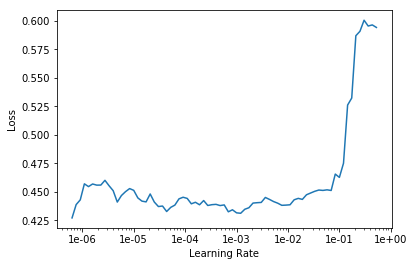

In [44]:
learn1.recorder.plot()

In [ ]:
#
sub='N'
if init=='Y' and sub=='N':
    #learn1.load('effnet')
    learn1.unfreeze()
    learn1.to_fp16()
    #learn1.load('unfreeze_b5o')
    
    learn1.fit_one_cycle(10, slice(1e-4,1e-2))#1e-3 50 ,1e-4 50
    #learn1.save('unfreeze_b5o')#3.429094	2.823128	0.785455	0.859890	


epoch,train_loss,valid_loss,accuracy,time
0,0.720408,0.949452,0.572114,05:06


In [78]:
learn1.save('dense')

In [55]:
#learn1.recorder.plot_lr()
#learn1.save('unfreeze_b5')
#learn1.load('unfreeze_b5o')
#learn1.to_fp16()
interp=ClassificationInterpretation.from_learner(learn1, ds_type=DatasetType.Train)

In [56]:
i,v=interp.top_losses(30)

In [57]:
print('top_losses',i,v)

top_losses tensor([13.7711, 13.0188, 11.6492, 11.5826,  9.0241,  8.7267,  8.6346,  7.6920,
         7.4995,  7.3810,  7.0233,  6.8804,  6.6972,  6.5814,  6.5189,  6.4667,
         6.3616,  5.9700,  5.6360,  5.6036,  5.3161,  5.1596,  4.9489,  4.8280,
         4.7787,  4.7213,  4.6515,  4.5656,  4.4908,  4.4618]) tensor([1062, 3152,  635,  663, 2460,  824, 3914, 3727, 1926, 2735, 3889, 1006,
        4074, 1119, 3202, 3589,  841, 2369,  656, 1978, 1017, 2971, 3201, 3517,
        2661, 3736, 3791,  859, 3542, 3428])


In [58]:
#v
#learn1.data.train_ds[2223][0]
#train_ds,train_idx=DatasetFormatter.from_toplosses(learn1,30)
#df_train.iloc[train_idx]
#data.train_ds.y.items[3958]

In [59]:
#a=np.array(learn1.data.train_ds.y.items)[2501]
#np.unique(a,return_counts=True)
#src.train.to_df()
from fastai.widgets.image_cleaner import *
#train_ds,train_idx=DatasetFormatter.from_toplosses(learn1,30)

class DatasetFormatter_Training(DatasetFormatter):
    @classmethod
    def from_training(cls, learn, n_imgs=None, ds_type:DatasetType=DatasetType.Train, **kwargs):
        dl = learn.dl(ds_type)
        if not n_imgs: n_imgs = len(dl.dataset)
        idxs = range(n_imgs)
        return cls.padded_ds(dl.dataset, **kwargs), idxs
#ds, idxs = DatasetFormatter_Training().from_training(learn1, n_imgs=30,ds_type=DatasetType.Train)

In [60]:
#df_train.iloc[3712]
#learn1.data.train_ds.y.items[71]
#ImageCleaner(train_ds, train_idx, '.')
#fd1 = ImageCleaner(train_ds, train_idx ,path='.')
#data.classes


In [61]:
if init=='N': 
# progressive resizing
    learn.data = (
            src.transform(tfms,size=324,resize_method =ResizeMethod.SQUISH)
            .databunch(bs=72)
            .normalize(imagenet_stats)
        )
    
    learn.to_fp16()
    learn.unfreeze()
    learn.load('unfreeze_256d201')
    learn.fit_one_cycle(6, slice(2e-6,4e-4)) 

In [62]:
print('Run everything before ..!')

Run everything before ..!


In [63]:
#lr = 1e-3
#learn.fit_one_cycle(1, slice(lr))

In [64]:
#learn.unfreeze()

#learn.lr_find()
#learn.recorder.plot(suggestion=True)
#learn.recorder.plot()

In [66]:
if sub=='N':
    
    learn1.model.eval()
    #learn.model.float()
    learn1.load('unfreeze_b5o')
    learn1.to_fp16()
    
    valid_predictions,targets = learn1.get_preds(ds_type=DatasetType.Valid)
    optR = OptimizedRounder()
    optR.fit(valid_predictions, targets)
    coefficients = optR.coefficients()
    print(coefficients)

0.9261030261030261
[0.512932 1.529911 2.363224 3.546428]


# Predictions

In [67]:
# test_df = pd.read_csv(PATH/'test.csv')
# test_df.head()
sample_df = pd.read_csv(PATH/'sample_submission.csv')
#sample_df.head()

In [68]:
#learn.recorder.plot_losses()

In [69]:
learn1.data.add_test(CustomImageList.from_df(sample_df,PATH,folder='test_images',suffix='.png'))

In [70]:
#learn.model.eval()
#learn.load('unfreeze_224')
#preds,y = learn.get_preds(DatasetType.Valid)

In [71]:
#sample_df.diagnosis = preds.argmax(1)
#sample_df.head()
#preds.size()
#learn.show_results()

In [72]:
#sample_df.to_csv('submission.csv',index=False)#0.526711 1.361491 2.64622  3.431939


In [73]:
#interp.plot_top_losses(9, figsize=(6,6)) 
test_df = pd.read_csv('../input/aptos2019-blindness-detection/sample_submission.csv')
learn1.model.eval()
#learn.model.float()
learn1.load('unfreeze_b5')
learn1.to_fp16()
#coefficients=[0.5, 1.5, 2.5, 3.5]
#[0.478939, 1.654964, 2.604063 ,3.318286]
#[0.57, 1.37, 2.52, 3.57] 76.8
#[0.5, 1.5, 2.5, 3.5]
#[0.57, 1.37, 2.57, 3.57]

preds,y = learn1.get_preds(ds_type=DatasetType.Test)


In [74]:
#df_i.index.size
#src1 [0.503323 1.424402 2.696104 3.121492][0.503323 1.424402 2.696104 3.121492]
coefficients=[0.526711 ,1.41491, 2.64622 , 3.431939] #78.4
#[0.52879,  1.2359234 ,2.601277 ,3.37904]
#[0.516956, 1.559324, 2.602234, 3.150385]
#[0.52879,  1.359234 ,2.661277 ,3.37904] #74
#[0.512537, 1.27379 , 2.701525 ,3.397141]
#[0.57, 1.37, 2.52, 3.57] 
#[0.512537, 1.27379 , 2.701525 ,3.397141]
#[0.52879 , 1.509234, 2.661277 ,3.217904]
#
#
#[0.62441,  1.2, 2.7 ,3.5]
#[0.57, 1.37, 2.52, 3.57] 
#[0.62441,  1.2, 2.7 ,3.5]
#[0.57, 1.37, 2.52, 3.57]

#[0.5, 1.5, 2.5, 3.5]
#[0.5, 1.5, 2.5, 3.5]
#[0.478939, 1.604964, 2.604063 ,3.318286]
opt = OptimizedRounder()
tst_pred = opt.predict(preds, coefficients)
test_df.diagnosis = tst_pred.astype(int)
test_df.to_csv('submission.csv',index=False)
test_df.diagnosis.value_counts()

2    987
0    360
3    267
1    242
4     72
Name: diagnosis, dtype: int64

In [75]:
#test_df.head(5)

In [76]:
# kfold 

import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from fastai.torch_core import *
from fastai.callbacks import *
from fastai.basic_train import *
from torchvision import models
import gc
gc.collect()
from sklearn.model_selection import KFold, StratifiedKFold
#df1=df.copy()
#train_labels = df1.apply(fill_targets, axis=1) # convert comma separated targets into list
#!cp *.pth ./data/models/
k_fold='N'
if k_fold=='Y'
    X = list(df_i.index.values)
    y=list(df_i.diagnosis.values)
    #mlb = MultiLabelBinarizer( )
    #y=mlb.fit_transform(df_i.Id.values)
    #df['labels_v']=df.labels.apply(lambda x: mlb.fit_transform( x  )

    #y=df.Target.values
    #print(X.shape)
    #np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
    #y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])

    mskf = StratifiedKFold(n_splits=8, random_state=2)

    #MultilabelStratifiedKFold(n_splits=9, random_state=2)
    #val_idx= df.loc[df.Id.isin(val_n)].index
    i=0
    #!cp *.pth ./data/models/
    #stage-1-rn50-f
    #learn.load('stage-1-rn50-f')
    #protein_stats =([0.08069, 0.05258, 0.05487, 0.08282],[0.13704, 0.10145, 0.15313, 0.13814])
    for train_index, test_index in mskf.split(X, y):
        val_i=test_index


        src1=  (CustomImageList.from_df(df_i,PATH,cols='id_code',folder='train_images',suffix='.png')
           .split_by_idx(val_i)
           #..split_by_valid_func(lambda path: path2fn(path) in val_fns)
            #.label_from_func(lambda path: fn2label[path2fn(path)]))
           .label_from_df( cols=1))

        '''
        src.add_test(test_fnames);
        src.test.x.create_func = open_4_channel2
        src.test.x.open = open_4_channel2
        '''
        #data.c=5004

        if i>=0:



            #trn_tfms,_ = get_transforms(do_flip=False, flip_vert=True, max_rotate=5., max_zoom=1.08,
            #                      max_lighting=0.15, max_warp=0. )
            #protein_stats = ([0.16258, 0.13877, 0.10067 ], [0.21966, 0.18559, 0.25573 ])


            data1 = (src1.transform(tfms, size=256,resize_method=ResizeMethod.CROP)
            .databunch(bs=56).normalize(imagenet_stats)) #40
            #FocalLoss(gamma=2.)
            learn1=create_cnn(data, 
                        base_arch=se_resnet101
                       #dense
                        ,cut=-2
                       ,split_on=lambda m: (m[0][3],     m[1])
                        #,split_on=_densenet_split
                        ,custom_head=custom_head
                        ,metrics=[accuracy,kappa,precision,recall],loss_func=loss_func

                        ,pretrained=True,path='.',callback_fns= partial(GradientClipping, clip=1))
            #learn.callback_fns.append(partial(SaveModelCallback,monitor='val_loss',mode='min'))
            learn1.callback_fns.append(partial(ReduceLROnPlateauCallback, min_delta=1e-5, patience=3))
            #learn.to_fp16()
            #learn.load('stage-1-rn50')
            #print('load')

            lr=1e-2
            #4e-4 # every 3-4 epocs reduce by 1 2e-3,1e-3.slice (lr/10,lr )
            #learn.load('stage-1-rn50-u7datablocks')
            #learn.load('stage-1-rn50-u11_512')
            if i==0:

                learn1.load('unfreeze_224se')
                print('x')
            else :

                learn1.load('unfreeze_256se')  #unfreeze_dens_284
            print(i)  
            learn1.unfreeze()
            learn1.fit_one_cycle(1, slice(2e-5,lr))
            learn1.save('unfreeze_256se')
        i=i+1


SyntaxError: invalid syntax (<ipython-input-76-b92aeb24601e>, line 16)

In [77]:
print('Train_loss',learn1.recorder.losses[-1])
print('Val loss',learn1.recorder.val_losses)

print('Accuracy',learn1.recorder.metrics) #[tensor(0.8455), tensor(0.8939), tensor(0.7235), tensor(0.7357)]]

Train_loss tensor(0.3186)
Val loss [0.30478176, 0.30337542, 0.30287218, 0.30366328, 0.3043266, 0.30371252, 0.3038256, 0.3043062, 0.30744848, 0.30769813, 0.3026655, 0.3050396, 0.30385518, 0.29877678, 0.30067062, 0.29844216, 0.2974845, 0.29998633, 0.29574943, 0.29583544, 0.2951272, 0.2956364, 0.29680306, 0.29538402, 0.3015525, 0.29382655, 0.29548502, 0.29369977, 0.29964182, 0.29995495, 0.3007725, 0.2995981, 0.29582873, 0.29438052, 0.29440007, 0.29336497, 0.29314372, 0.29393178, 0.29188, 0.2922289, 0.29109523, 0.29205987, 0.29185328, 0.29179654, 0.29191023, 0.29126325, 0.29155433, 0.291159]
Accuracy [[tensor(0.8429), tensor(0.5528), tensor(0.7988)], [tensor(0.8467), tensor(0.5602), tensor(0.8052)], [tensor(0.8464), tensor(0.5561), tensor(0.7988)], [tensor(0.8464), tensor(0.5536), tensor(0.7938)], [tensor(0.8460), tensor(0.5529), tensor(0.8002)], [tensor(0.8474), tensor(0.5501), tensor(0.7911)], [tensor(0.8485), tensor(0.5502), tensor(0.8050)], [tensor(0.8442), tensor(0.5586), tensor(0.799

In [78]:
def crop_image_from_gray(img,tol=9):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img
def open_rgby1(path,id): #a function that reads RGBY image
    im = cv2.imread(path)
    #b=time.time()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    #dst = cv2.cv2.fastNlMeansDenoising(im,None, 10,7,21)
    #im=  cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
    #a=time.time()
    #print(a-b)
    #crop_image_from_gray(img_o)
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
    #colors = ['red','green','blue','yellow']
    #colors = ['blue','red','green','yellow']
    #colors = ['green','red','blue','yellow']
    #print(os.path.join(path, +'_'+'red'+'.png'))
    #flags = cv2.IMREAD_GRAYSCALE
    return im

In [79]:
'''
def open_rgby1(path,id): #a function that reads RGBY image
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
    #colors = ['red','green','blue','yellow']
    #colors = ['blue','red','green','yellow']
    #colors = ['green','red','blue','yellow']
    #print(os.path.join(path, +'_'+'red'+'.png'))
    #flags = cv2.IMREAD_GRAYSCALE
    return im
'''

"\ndef open_rgby1(path,id): #a function that reads RGBY image\n    im = cv2.imread(path)\n    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)\n    #im = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)\n    #colors = ['red','green','blue','yellow']\n    #colors = ['blue','red','green','yellow']\n    #colors = ['green','red','blue','yellow']\n    #print(os.path.join(path, +'_'+'red'+'.png'))\n    #flags = cv2.IMREAD_GRAYSCALE\n    return im\n"

In [80]:
#df.head(2)

../input/aptospreprocessed224x/train_images_processed_224x/train_images_processed_224x/7525ebb3434d.png.png
7525ebb3434d 1651    3
Name: diagnosis, dtype: int64
(224, 224, 3)


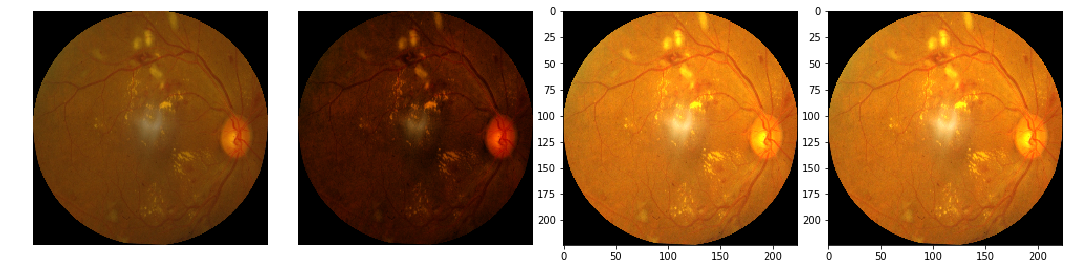

../input/aptospreprocessed224x/train_images_processed_224x/train_images_processed_224x/a4d4b69f7404.png.png
a4d4b69f7404 2358    3
Name: diagnosis, dtype: int64
(224, 224, 3)


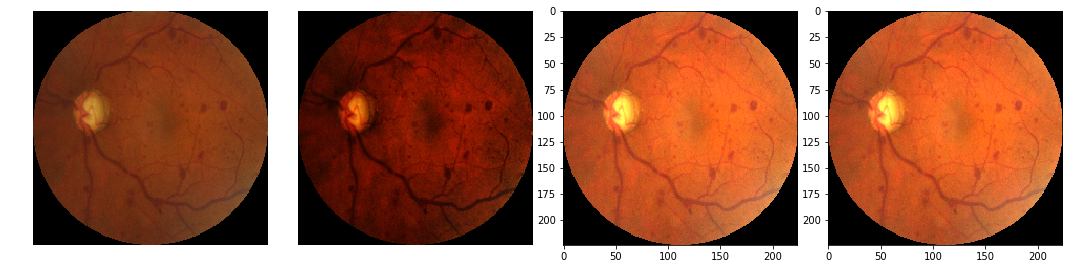

../input/aptospreprocessed224x/train_images_processed_224x/train_images_processed_224x/069f43616fab.png.png
069f43616fab 81    3
Name: diagnosis, dtype: int64
(224, 224, 3)


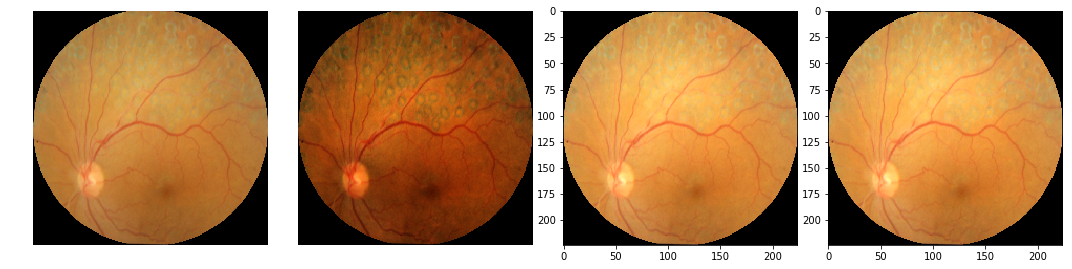

../input/aptospreprocessed224x/train_images_processed_224x/train_images_processed_224x/cb28adab4e8a.png.png
cb28adab4e8a 2929    0
Name: diagnosis, dtype: int64
(224, 224, 3)


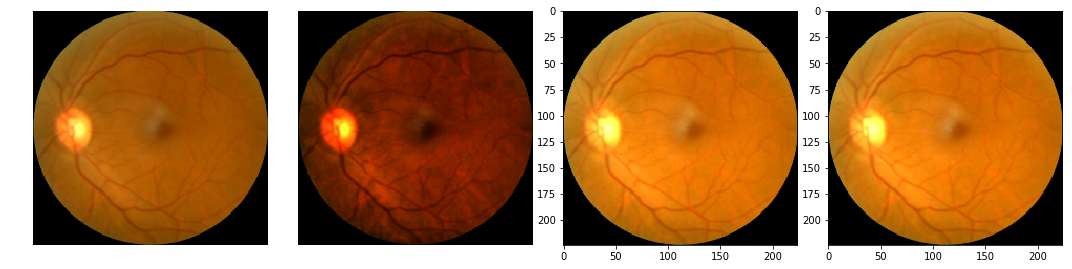

In [81]:
 
import cv2
from PIL import ImageEnhance
from sklearn.cluster import KMeans
import numpy as np
from PIL import ImageFilter

#import albumentations.augmentations.functional as F
import time
import numpy as np # linear algebra
from PIL import ImageOps,ImageChops
#TRAIN = '../input/human-protein-atlas-image-classification/train/'
#TEST = '../input/human-protein-atlas-image-classification/test/'
TRAIN = '../input/aptospreprocessed224x/train_images_processed_224x/train_images_processed_224x'
#'../input/aptos2019-blindness-detection/train_images'
TEST = '../input/aptos2019-blindness-detection/test_images'
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.data import imread
from skimage import restoration,exposure
import matplotlib.pyplot as plt
from skimage.filters import gaussian,laplace,median
import random
import warnings
warnings.filterwarnings("ignore")
from skimage.color import rgb2gray
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage import exposure

from skimage.morphology import disk
from skimage.filters import rank,gaussian,gabor_kernel,gabor
from scipy import ndimage
import os
#https://www.kaggle.com/inversion/run-length-decoding-quick-start
ImageId = 'c736e5371.jpg'
#'d8fbe2c55.jpg' #very poor
#'001234638.jpg' good
#'000532683.jpg'poor
#'ff7ac7f3c.jpg'
#img = cv2.imread('wiki.jpg',0)

 
#'000194a2d.jpg'

#b = rand0(0.05)
#c = rand0(0.05)
#c = -1/(c-1) if c<0 else c+1
#RandomLighting(0.05, 0.05, tfm_y=TfmType.NO) 
#x = lighting(x, b, c)        
train_names = sorted({f for f in os.listdir(TRAIN)}) #extract unique names as each image has 4 channels
test_names = sorted({f for f in os.listdir(TEST)})  
#print(segmentation_df.loc[ ImageId][ 'EncodedPixels'])
#print(segmentation_df.loc[ '0005d01c8.jpg'][ 'EncodedPixels'])
pth=TRAIN
pth=TEST

#TRAIN
#mask_df=segmentation_df
train_names=df[df.diagnosis==3].id_code.values.tolist()
l_ran=random.sample(train_names,3)
l_ran.append('cb28adab4e8a') 
l_encode=[]
#test_names[40:55]
#l_test=['7a2df604b.jpg','496003795.jpg','5207731a4.jpg','7ec3fae41.jpg','3489278fe.jpg','5207731a4.jpg','08404e9c5.jpg','ccd9ca8b4.jpg','6141d2860.jpg','0b15befb5.jpg','fd58cb592.jpg','fd58cb592.jpg','a336205a8.jpg','951f906d4.jpg','6aa30bc5a.jpg','9e9fb1297.jpg','cd60d5bf1.jpg','9d85760da.jpg','5728b99ac.jpg','6aa30bc5a.jpg','34671bb33.jpg','e50507721.jpg','2b21e5113.jpg','bcb84cbc5.jpg','284d4375e.jpg','c066ba16b.jpg','ce884eeb4.jpg' ,'1c7d4f796.jpg']
#l_train=tr_n_e[50:65]
#print(l_train)
#a=test_names[0:20]
#a.append('00631ec8-bad9-11e8-b2b9-ac1f6b6435d0')
view=TRAIN
for names in l_ran:
                   
#l[1:20]:
#tr_n_e[6760:6780]:
    path = os.path.join(TRAIN, names+'.png.png')
    # img_o,x,data
    print(path)
    img_o= open_rgby1(path,1)#load_image(path, INPUT_SHAPE)
    print(names,df[df.id_code==names.split('.')[0]]['diagnosis'])
    b=time.time()
    image = crop_image_from_gray(img_o)
    #gk,_ = gabor(image, frequency=0.6)
    
    #print(a-b)
    #b=time.time()
    #image = cv2.resize(image, (512, 512))
    #k = np.max(im.shape)//20*2+1
   
    #bg = cv2.GaussianBlur( image , (0,0) , 10)
    #a=time.time()
    #print(a-b)
    
    #image=cv2.addWeighted ( image,4,bg  ,-4 ,128)
    #a=time.time() 
   # print(a-b)
    #gr = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #x=median(gr)
    #x = cv2.cvtColor(x, cv2.COLOR_GRAY2RGB)
    #x=exposure.equalize_adapthist(x)
    #selem = disk(10)
    #im_e=image.copy()
    #im_e[:,:,1]=rank.equalize(im_e[:,:,1],selem)
    #img_eq = exposure.equalize_adapthist(image,kernel_size=(3,3),clip_limit=0.1)
    img_eq=exposure.adjust_gamma(image,2)
    img_eq=exposure.equalize_adapthist(img_eq)
    #ndimage.median_filter(image, 2)
    #img_eq = cv2.cvtColor(img_eq, cv2.COLOR_GRAY2RGB)
   
    #image[:,:,1]=image[:,:,1]*1.1
    #aug = RandomBrightnessContrast1( 0.3,0.3,True)
    #alb=augment(aug,img_o1)
    
    #im1 = Image.fromarray(np.uint8(image)*255  )
    #im1= im1.filter(ImageFilter.UnsharpMask(threshold=3))
    print(img_o.shape)
    #im = Image.open(os.path.join(TRAIN, names))
    #im = ImageOps.autocontrast(im1)
    a=time.time()
    p2, p98 = np.percentile(image, (2, 98))
    im=exposure.rescale_intensity(image,(p2,p98))
    im1=ndimage.uniform_filter(im, size=1)
    #im1=laplace(img_o)
    #exposure.equalize_hist(img_o )
    
    fig, axarr = plt.subplots(1,4, figsize=(15, 20))
    axarr[0].axis('off')
    axarr[1].axis('off')
   
    axarr[0].imshow(img_o)
    axarr[1].imshow(img_eq )
    axarr[2].imshow(im )
    #axarr[3].imshow(im )
    axarr[3].imshow(im1 )
    #axarr[3].imshow(img_o1)
    #plt.set_title('Label: %s-%s' % (df[df.id_code==names]['diagnosis'][0], names) )
   
   
    #axarr[4].imshow(segmentation)
#axarr[3].imshow(all_masks, alpha=0.4)
    plt.tight_layout(h_pad=0.1, w_pad=0.1)
    plt.show()   #496003795.jpg ,3489278fe.jpg,7ec3fae41.jpg,7a2df604b.jpg
   # image.show()
  

In [82]:
'''
from PIL import Image as ImgP, ImageOps,ImageChops
fig, axs = plt.subplots(1,5,figsize=(12,4))
for names in l_ran:
                   
#l[1:20]:
#tr_n_e[6760:6780]:
    path = os.path.join(TRAIN, names)
    # img_o,x,data
    #img_o= open_rgby1(path,1)
    im1=open_image(path)
    #im1 = ImgP.fromarray(np.uint8(img_o)*255  )
    for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
        contrast(im1, scale).show(ax=ax, title=f'scale={scale:.2f}')
'''


"\nfrom PIL import Image as ImgP, ImageOps,ImageChops\nfig, axs = plt.subplots(1,5,figsize=(12,4))\nfor names in l_ran:\n                   \n#l[1:20]:\n#tr_n_e[6760:6780]:\n    path = os.path.join(TRAIN, names)\n    # img_o,x,data\n    #img_o= open_rgby1(path,1)\n    im1=open_image(path)\n    #im1 = ImgP.fromarray(np.uint8(img_o)*255  )\n    for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):\n        contrast(im1, scale).show(ax=ax, title=f'scale={scale:.2f}')\n"